# Convolutional Neural Network Architecture

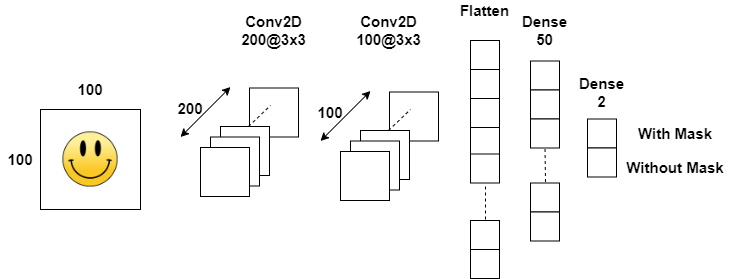

In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

#loading the save numpy arrays in the previous code

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import Conv2D,MaxPooling2D
from keras.callbacks import ModelCheckpoint

model=Sequential()

model.add(Conv2D(200,(3,3),input_shape=data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The first CNN layer followed by Relu and MaxPooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#The second convolution layer followed by Relu and MaxPooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#Flatten layer to stack the output convolutions from second convolution layer
model.add(Dense(50,activation='relu'))
#Dense layer of 64 neurons
model.add(Dense(2,activation='softmax'))
#The Final layer with two outputs for two categories

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [3]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [4]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.6806 - accuracy: 0.5838INFO:tensorflow:Assets written to: model-001.model\assets


INFO:tensorflow:Assets written to: model-001.model\assets


31/31 [==============================] - 87s 3s/step - loss: 0.6806 - accuracy: 0.5838 - val_loss: 0.6787 - val_accuracy: 0.5806
Epoch 2/20
31/31 [==============================] - ETA: 0s - loss: 0.5192 - accuracy: 0.7505INFO:tensorflow:Assets written to: model-002.model\assets


INFO:tensorflow:Assets written to: model-002.model\assets


31/31 [==============================] - 73s 2s/step - loss: 0.5192 - accuracy: 0.7505 - val_loss: 0.4444 - val_accuracy: 0.7903
Epoch 3/20
31/31 [==============================] - ETA: 0s - loss: 0.3026 - accuracy: 0.8798INFO:tensorflow:Assets written to: model-003.model\assets


INFO:tensorflow:Assets written to: model-003.model\assets


31/31 [==============================] - 82s 3s/step - loss: 0.3026 - accuracy: 0.8798 - val_loss: 0.3218 - val_accuracy: 0.8589
Epoch 4/20
31/31 [==============================] - 61s 2s/step - loss: 0.2305 - accuracy: 0.9111 - val_loss: 0.3954 - val_accuracy: 0.8226
Epoch 5/20
31/31 [==============================] - ETA: 0s - loss: 0.1765 - accuracy: 0.9354INFO:tensorflow:Assets written to: model-005.model\assets


INFO:tensorflow:Assets written to: model-005.model\assets


31/31 [==============================] - 56s 2s/step - loss: 0.1765 - accuracy: 0.9354 - val_loss: 0.2716 - val_accuracy: 0.9234
Epoch 6/20
31/31 [==============================] - ETA: 0s - loss: 0.1266 - accuracy: 0.9545INFO:tensorflow:Assets written to: model-006.model\assets


INFO:tensorflow:Assets written to: model-006.model\assets


31/31 [==============================] - 58s 2s/step - loss: 0.1266 - accuracy: 0.9545 - val_loss: 0.2168 - val_accuracy: 0.9315
Epoch 7/20
31/31 [==============================] - 58s 2s/step - loss: 0.0832 - accuracy: 0.9717 - val_loss: 0.2173 - val_accuracy: 0.9315
Epoch 8/20
31/31 [==============================] - 57s 2s/step - loss: 0.0677 - accuracy: 0.9768 - val_loss: 0.2434 - val_accuracy: 0.9194
Epoch 9/20
31/31 [==============================] - 57s 2s/step - loss: 0.0610 - accuracy: 0.9778 - val_loss: 0.3579 - val_accuracy: 0.9032
Epoch 10/20
31/31 [==============================] - 57s 2s/step - loss: 0.0449 - accuracy: 0.9818 - val_loss: 0.3003 - val_accuracy: 0.9113
Epoch 11/20
31/31 [==============================] - 56s 2s/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.3505 - val_accuracy: 0.8952
Epoch 12/20
31/31 [==============================] - 57s 2s/step - loss: 0.0689 - accuracy: 0.9717 - val_loss: 0.2636 - val_accuracy: 0.9234
Epoch 13/20
31/31 [=========

In [6]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Saikat Naskar\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


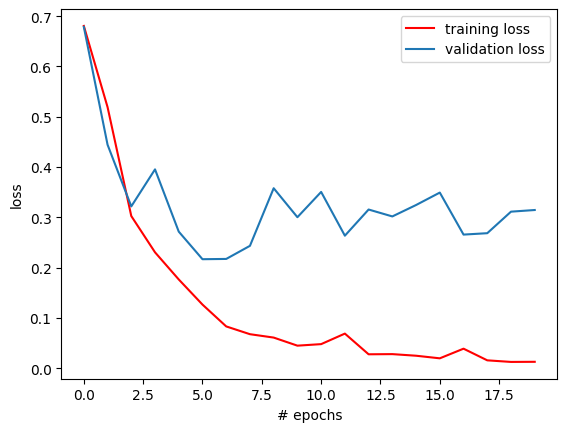

In [7]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

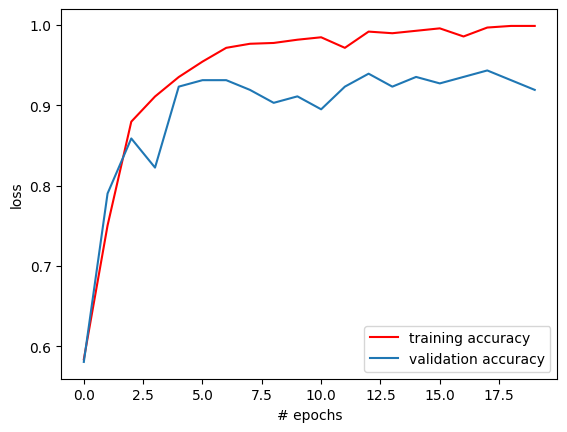

In [8]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [9]:
print(model.evaluate(test_data,test_target))

5/5 [==============================] - 2s 328ms/step - loss: 0.0631 - accuracy: 0.9855
[0.06313403695821762, 0.9855072498321533]
